In [1]:
!pip install wordcloud


    100% |████████████████████████████████| 163kB 3.6MB/s ta 0:00:01
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
from collections import Counter


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('sentiwordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saurabhsharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/saurabhsharma/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [3]:
from matplotlib import pyplot as plt

In [4]:
import pandas as pd

In [5]:
filename = "lyrics.csv"

In [6]:
df = pd.read_csv(filename)

In [7]:
df.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [8]:
df = df[df['lyrics']!='instrumental'].dropna()

In [9]:
genres = df.genre.unique()

In [10]:
from nltk.corpus import stopwords

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saurabhsharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stopwords = set(stopwords.words('english'))

In [15]:
wordcloud_all = Counter([x if x.lower() not in stopwords else None for x in " ".join(df["lyrics"]).split()]).most_common(100)

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [17]:
all_text = "".join([x if x.lower() not in stopwords or len(x)>3 else "" for x in " ".join(df["lyrics"]).split()])

Wordcloud for all the lyrics

In [19]:
wordcloud = WordCloud(collocations = False,stopwords=stopwords, background_color="white").generate(all_text)

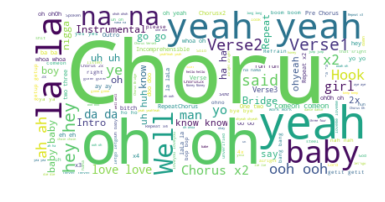

In [20]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
stopwords.update(['chorus','yeah','repeat','oh'
])

In [22]:
wc_genre = {}

In [23]:
for genre in genres:
  tx = "".join([x.lower() if x.lower() not in stopwords and len(x)>4 else "" for x in " ".join(df.loc[df['genre'] == genre]['lyrics']).split()])
  wc_genre[genre] = WordCloud(collocations=False,stopwords=stopwords, background_color="white").generate(tx)

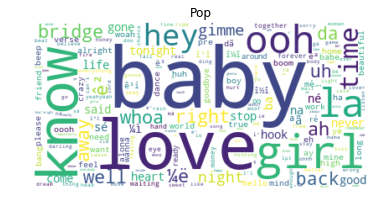

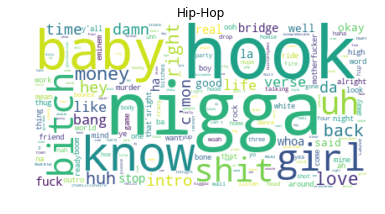

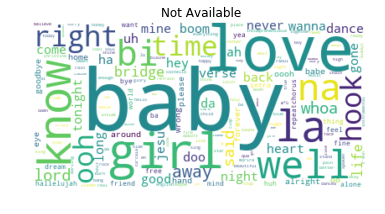

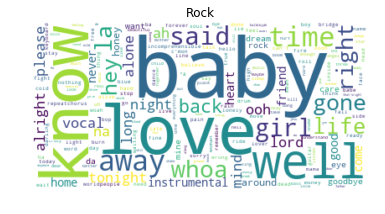

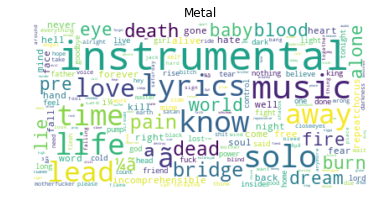

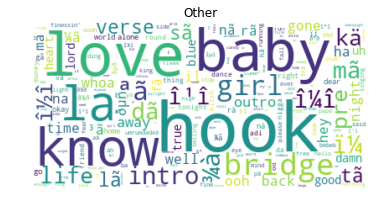

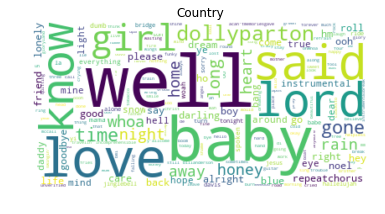

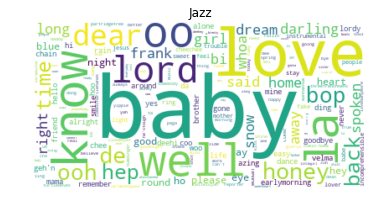

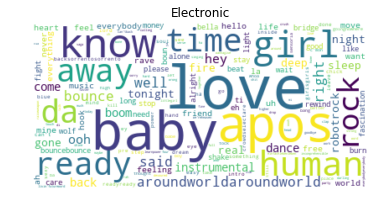

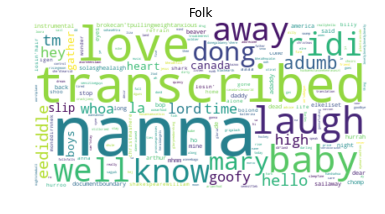

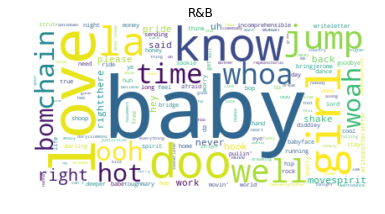

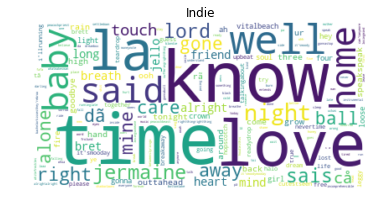

In [24]:
for k,v in wc_genre.items():
  plt.figure()
  plt.imshow(v, interpolation="bilinear")
  plt.axis("off")
  plt.title(k)
  plt.show()

Word Cloud

In [0]:
!pip install langdetect

In [0]:
decades = [1970,1980,1990,2000,2010,2020]
wc_decades = {}
for i in range(len(decades)-1):
  tx = "".join([x.lower() if x.lower() not in stopwords and len(x)>4 else "" for x in " ".join(df.loc[df['year'] >= decades[i]].loc[df['year']<decades[i+1]]['lyrics']).split()])
  wc_decades[decades[i]] = WordCloud(collocations=False,stopwords=stopwords, background_color="white").generate(tx)

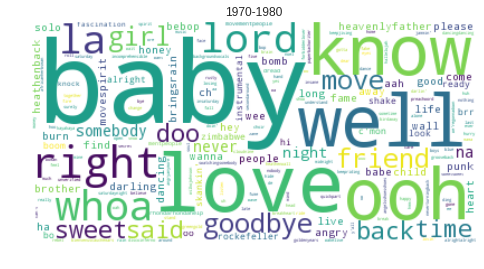

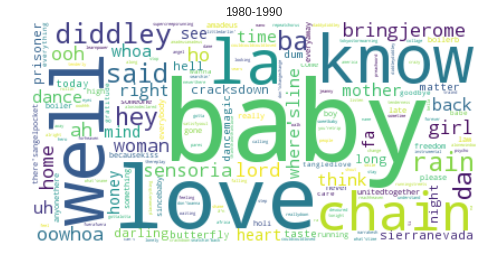

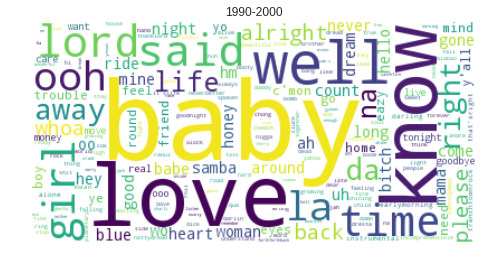

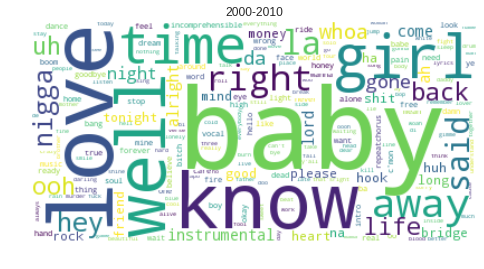

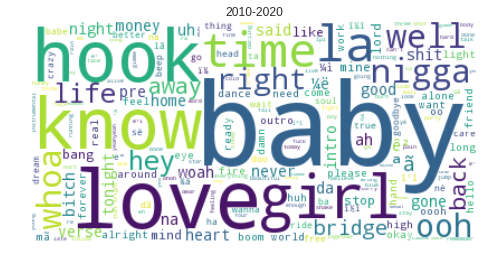

In [0]:
for k,v in wc_decades.items():
  plt.figure()
  v.to_file(str(k)+"-"+str(k+10)+".png")
  plt.imshow(v, interpolation="bilinear")
  plt.axis("off")
  plt.title(str(k)+"-"+str(k+10))
  plt.show()

In [0]:
from nltk.stem import WordNetLemmatizer

In [0]:
lemmatizer = WordNetLemmatizer()

In [0]:
lyrics = df['lyrics']
vocab = set()
for lyric in lyrics:
  words = lyric.split()
  for word in words:
    vocab.add(lemmatizer.lemmatize(word.lower()))

In [0]:
import nltk
import pandas as pd
from langdetect import detect
df2 = df.sample(100)
df2 = df2.dropna()
df2['lyrics'] = df2['lyrics'].replace(r'\n', ' ', regex = True)
ly = df2['lyrics'].tolist()
r = []
for l in ly:
    if (any(c.isalpha() for c in l) and detect(l) == 'en'):
        r.append(l)
v = []
for element in r:
    v += element.split()


k = 7
she_phrases = []
for ngram in nltk.ngrams(v, 2*k+1, pad_left=True, pad_right=True, left_pad_symbol=" ", right_pad_symbol = " "):
    if ngram[k].lower() == "she":
        s = " ".join(ngram)
        print('s', s)
        she_phrases.append(s)
        
she_phrases[0:5]

Store lyrics for each genre

In [0]:
df['lyrics'] = df['lyrics'].replace(r'\n', ' ', regex = True)

In [0]:
for genre in genres:
  lyrics = df.loc[df['genre']==genre]['lyrics'].tolist()
  with open(genre+'_lyrics.txt', 'w') as f:
    for item in lyrics:
        f.write("%s" % item)